<a href="https://colab.research.google.com/github/Prakhosha/Regressions_method_comparison/blob/master/Regression_methods_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
! git clone https://github.com/Prakhosha/Regressions_method_comparison
  
# import file
data_file = "Regressions_method_comparison/regression.csv"
dataset=np.genfromtxt(data_file, delimiter=',',skip_header=1)

# prepare the training and the testing data
X = dataset[:,1].reshape(-1,1)
y = dataset[:,2].reshape(-1,1)
sorting = np.argsort(X, axis=0) # for sorting the data
X = np.array(X)[sorting].reshape(-1,1)
y = np.array(y)[sorting].reshape(-1,1)

# train-validation split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=10)

Cloning into 'Regressions_method_comparison'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 25 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [3]:
# visualize the result, choose the best polynomial degree
def visualize_optimization(error_list, error_val_list):
  plt.figure()
  plt.plot(error_list, label='Training')
  plt.plot(error_val_list, label='Validation')
  plt.legend()
  plt.ylabel('Error')

# visualize prediction
def visualize_result(X, y, pred, error_list, error_val_list):
  plt.figure()
  plt.plot(X, y, 'o', label='Training Data')
  plt.plot(X, pred, label='Prediction')
  plt.legend()
  plt.xlabel('X')
  plt.ylabel('y')
  print("Training error: ", error_list)
  print("Validation error: ", error_val_list)

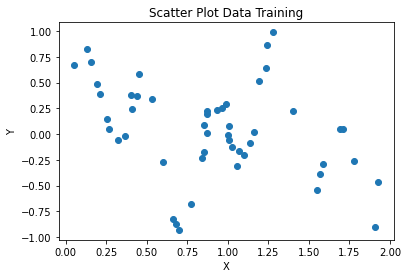

In [4]:
plt.figure()
plt.plot(X, y, 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot Data Training')
plt.savefig('Data_Training_Poly.png')

#Polynomial Linear Regression

Text(0.5, 0, 'Polynomial Degree')

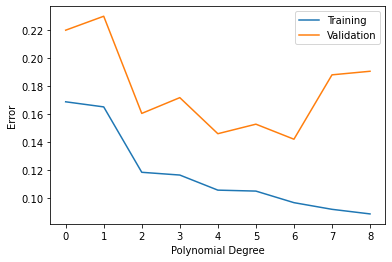

In [6]:
# create an empty list to store our model characteristics such as prediction, training error, and validation error
model_poly = []
y_pred_list = []
error_list = []
error_val_list = []

# do polynomial regressions for different value of degree
for i in range(1,10):
  # create model and predict for training and validation set
  model = LinearRegression().fit(PolynomialFeatures(degree = i ).fit_transform(x_train), y_train)
  y_pred = model.predict(PolynomialFeatures(degree = i ).fit_transform(x_train))
  y_pred_val = model.predict(PolynomialFeatures(degree = i ).fit_transform(x_val))

  # calculate mean squared error for the training and validation set
  error_train = mean_squared_error(y_train, y_pred)
  error_val = mean_squared_error(y_val, y_pred_val)

  # store the model
  model_poly.append(model)
  y_pred_list.append(y_pred)
  error_list.append(error_train)
  error_val_list.append(error_val)

# visualize the model's results for optimization purpose
visualize_optimization(error_list, error_val_list)
plt.xlabel('Polynomial Degree')

Training error:  0.10504590843057895
Validation error:  0.15287495544908586


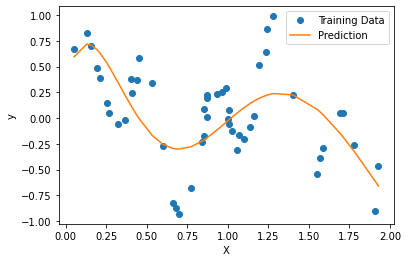

In [7]:
# predict using the choosen degree, in this case 6
pred = model_poly[5].predict(PolynomialFeatures(degree = 6 ).fit_transform(X))
visualize_result(X, y, pred, error_list[5], error_val_list[5])

# SVM Regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Text(0.5, 0, 'Polynomial Degree')

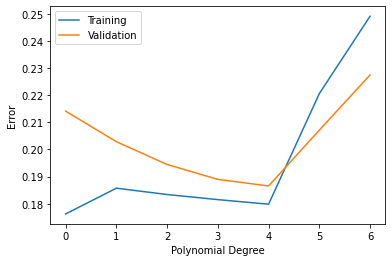

In [9]:
# create an empty list to store our model characteristics such as prediction, training error, and validation error
model_svr = []
y_pred_list = []
error_list = []
error_val_list = []

# do polynomial regressions for different value of degree
for i in range(1,8):
  # create model and predict for training and validation set
  model = SVR(kernel='poly', degree = i).fit(x_train, y_train)
  y_pred = model.predict(x_train)
  y_pred_val = model.predict(x_val)

  # calculate mean squared error for the training and validation set
  error_train = mean_squared_error(y_train, y_pred)
  error_val = mean_squared_error(y_val, y_pred_val)

  # store the model
  model_svr.append(model)
  y_pred_list.append(y_pred)
  error_list.append(error_train)
  error_val_list.append(error_val)

# visualize the model's results for optimization purpose
visualize_optimization(error_list, error_val_list)
plt.xlabel('Polynomial Degree')

Training error:  0.18150096147253728
Validation error:  0.18895995960009732


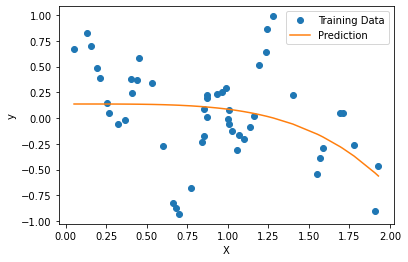

In [10]:
# predict using the choosen degree, in this case 4
pred = model_svr[3].predict(X)
visualize_result(X, y, pred, error_list[3], error_val_list[3])

#K-Nearest Neighbor

Text(0.5, 0, 'Neighbors')

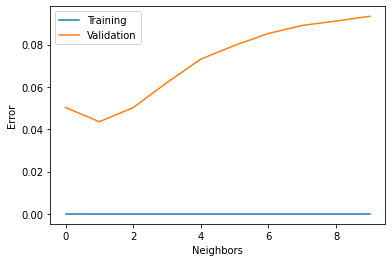

In [11]:
# create an empty list to store our model characteristics such as prediction, training error, and validation error
model_kn = []
y_pred_list = []
error_list = []
error_val_list = []

# do KNN regressions for different value of degree
for i in range(1,11):
  # create model and predict for training and validation set
  model = KNeighborsRegressor(n_neighbors= i , weights='distance', algorithm='auto').fit(x_train, y_train)
  y_pred = model.predict(x_train)
  y_pred_val = model.predict(x_val)

  # calculate mean squared error for the training and validation set
  error_train = mean_squared_error(y_train, y_pred)
  error_val = mean_squared_error(y_val, y_pred_val)

  # store the model
  model_kn.append(model)
  y_pred_list.append(y_pred)
  error_list.append(error_train)
  error_val_list.append(error_val)

# visualize the model's results for optimization purpose
visualize_optimization(error_list, error_val_list)
plt.xlabel('Neighbors')

Training error:  0.0
Validation error:  0.043532916716317184


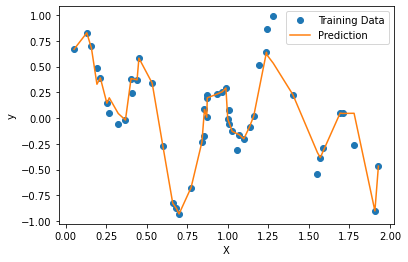

In [12]:
# predict using the choosen neighboors, in this case 2
pred = model_kn[1].predict(X)
visualize_result(X, y, pred, error_list[1], error_val_list[1])

# Decision Trees

Text(0.5, 0, 'Depth')

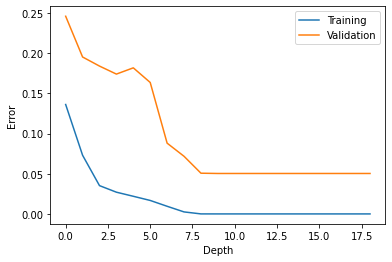

In [13]:
# create an empty list to store our model characteristics such as prediction, training error, and validation error
model_dt = []
y_pred_list = []
error_list = []
error_val_list = []

# do decision tree regressions for different value of degree
for i in range(1,20):
  # create model and predict for training and validation set
  model = DecisionTreeRegressor(max_depth=i).fit(x_train, y_train)
  y_pred = model.predict(x_train)
  y_pred_val = model.predict(x_val)

  # calculate mean squared error for the training and validation set
  error_train = mean_squared_error(y_train, y_pred)
  error_val = mean_squared_error(y_val, y_pred_val)

  # store the model
  model_dt.append(model)
  y_pred_list.append(y_pred)
  error_list.append(error_train)
  error_val_list.append(error_val)

# visualize the model's results for optimization purpose
visualize_optimization(error_list, error_val_list)
plt.xlabel('Depth')

Training error:  0.0
Validation error:  0.05030126435110562


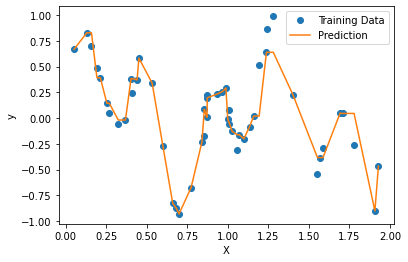

In [16]:
# predict using the choosen depth, in this case 10
pred = model_dt[9].predict(X)
visualize_result(X, y, pred, error_list[9], error_val_list[9])